In [1]:
# Cell 1: Install dependencies
!pip install -q ultralytics gdown matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.6 MB/s eta 0:00:00:00:0100:01


In [2]:
# Cell 2: Import libraries
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [8]:
model = YOLO('yolo11n-cls.pt')

results = model.train(
    data='/kaggle/input/recaptcha-data/recaptcha_data', 
    epochs=100,
    imgsz=224,
    batch=-1,
    name='recaptcha_cls',
    project='/kaggle/working/runs',
    save=True,
    plots=True,
)

print("Training complete. Check /kaggle/working/runs/detect/train/ for logs/plots.")

Ultralytics 8.3.203 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/recaptcha-data/recaptcha_data, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=recaptcha_cls, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

KeyboardInterrupt: 

In [11]:
# Cell 5: Validate and print key metrics (top-1/top-5 accuracy)
model = YOLO('/kaggle/working/runs/recaptcha_cls/weights/best.pt')
val_results = model.val(data='/kaggle/input/recaptcha-data/recaptcha_data')

print(f"Validation Results:")
print(f"Top-1 Accuracy: {val_results.top1:.1%}")  
print(f"Top-5 Accuracy: {val_results.top5:.1%}") 

Ultralytics 8.3.203 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 47 layers, 1,542,677 parameters, 0 gradients, 3.2 GFLOPs
train: /kaggle/input/recaptcha-data/recaptcha_data/train... found 16439 images in 13 classes ✅ 
val: /kaggle/input/recaptcha-data/recaptcha_data/val... found 4117 images in 13 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 39.8±4.5 MB/s, size: 21.0 KB)
val: Scanning /kaggle/input/recaptcha-data/recaptcha_data/val... 4117 images, 0 corrupt: 100% ━━━━━━━━━━━━ 4117/4117 3.9Kit/s 1.0s0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/recaptcha-data/recaptcha_data is not writeable, cache not saved.
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 258/258 42.7it/s 6.0s<0.0s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all      0.849      0.997
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /kaggle/working/runs/classify/val
Validation Results:
Top-1 Accuracy: 84.9%
Top-5 Accuracy: 99.7%


In [12]:
import glob

train_classes = sorted([os.path.basename(d) for d in glob.glob('/kaggle/input/recaptcha-data/recaptcha_data/train/*') if os.path.isdir(d)])
val_classes = sorted([os.path.basename(d) for d in glob.glob('/kaggle/input/recaptcha-data/recaptcha_data/val/*') if os.path.isdir(d)])
print(f"Training classes ({len(train_classes)}): {train_classes}")
print(f"Validation classes ({len(val_classes)}): {val_classes}")
if train_classes != val_classes:
    print("Warning: Training and validation classes differ!")
if len(train_classes) != 13:
    print(f"Warning: Expected 13 classes (Bicycle, Bridge, Bus, Car, Chimney, Crosswalk, Hydrant, Motorcycle, Mountain, Other, Palm, Stairs, Traffic Light), found {len(train_classes)}. Missing class may reduce accuracy.")

Training classes (13): ['Bicycle', 'Bridge', 'Bus', 'Car', 'Chimney', 'Crosswalk', 'Hydrant', 'Motorcycle', 'Mountain', 'Other', 'Palm', 'Stairs', 'Traffic Light']
Validation classes (13): ['Bicycle', 'Bridge', 'Bus', 'Car', 'Chimney', 'Crosswalk', 'Hydrant', 'Motorcycle', 'Mountain', 'Other', 'Palm', 'Stairs', 'Traffic Light']


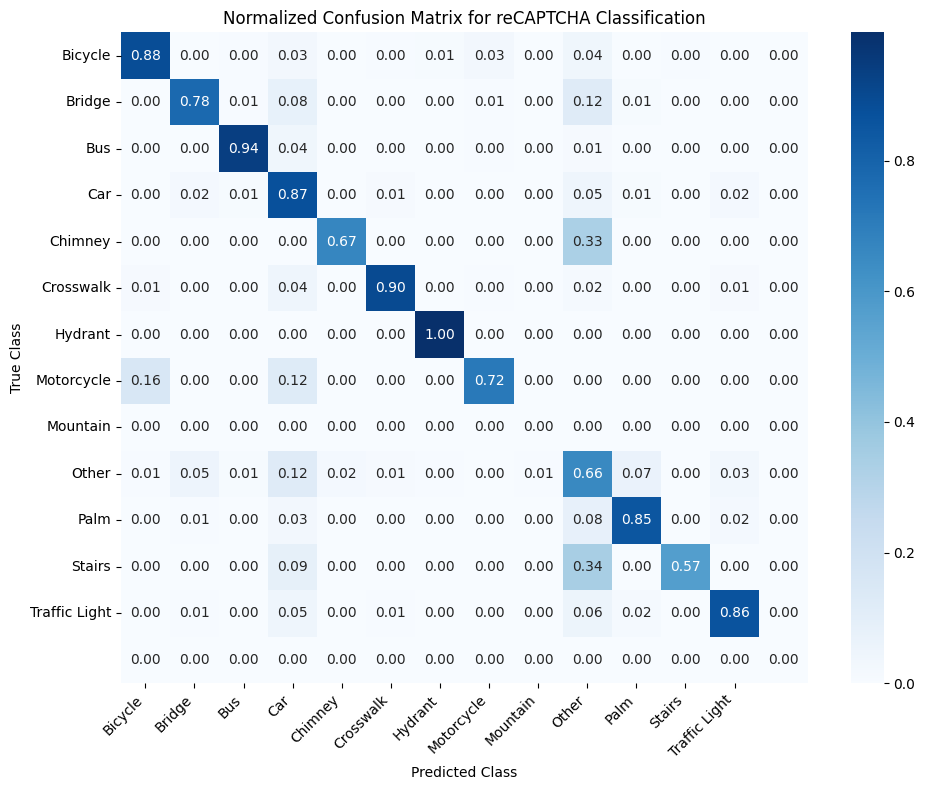

Model saved. For inference: probs = model('path/to/image.jpg')


In [17]:
cm = val_results.confusion_matrix.matrix
class_names = train_classes  # Use dataset directory class names
cm_normalized = cm / (cm.sum(axis=1, keepdims=True) + 1e-6)  # Normalize to avoid division by zero

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Normalized Confusion Matrix for reCAPTCHA Classification')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Cell 7: Save model
model.save('/kaggle/working/recaptcha_yolov8n-cls.pt')
print("Model saved. For inference: probs = model('path/to/image.jpg')")